In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/traffic.csv')

print(dataset.shape)
dataset["DateTime"]= pd.to_datetime(dataset["DateTime"])
dataset = dataset.drop(["ID"], axis=1)

(48120, 4)


In [ ]:
dataset.head

<bound method NDFrame.head of                  DateTime  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 01:00:00         1        13
2     2015-11-01 02:00:00         1        10
3     2015-11-01 03:00:00         1         7
4     2015-11-01 04:00:00         1         9
...                   ...       ...       ...
48115 2017-06-30 19:00:00         4        11
48116 2017-06-30 20:00:00         4        30
48117 2017-06-30 21:00:00         4        16
48118 2017-06-30 22:00:00         4        22
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]>

In [ ]:
dataset.isnull().sum() #no null values

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [ ]:
df = dataset.copy()
df.head()
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


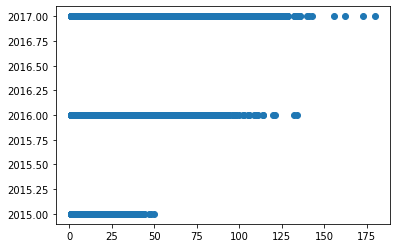

In [ ]:
plt.scatter(df['Vehicles'],df['Year'])

In [ ]:
X=df[['Junction','Year','Month','Date_no','Hour']]
y=df['Vehicles']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36090, 5)
(12030, 5)
(36090,)
(12030,)


In [ ]:
X_train

,Junction,Year,Month,Date_no,Hour
34490,3,2016,6,9,2
26227,2,2017,2,27,19
37282,3,2016,10,3,10
26578,2,2017,3,14,10
23034,2,2016,10,17,18
...,...,...,...,...,...
40059,3,2017,1,27,3
28017,2,2017,5,13,9
29199,3,2015,11,1,15
40061,3,2017,1,27,5


In [ ]:
y_train

34490     3
26227    33
37282    22
26578    21
23034    17
         ..
40059    10
28017    17
29199     6
40061     7
17673    12
Name: Vehicles, Length: 36090, dtype: int64

In [ ]:
X_test

,Junction,Year,Month,Date_no,Hour
44678,4,2017,2,7,14
13978,1,2017,6,5,10
32733,3,2016,3,27,21
13192,1,2017,5,3,16
37531,3,2016,10,13,19
...,...,...,...,...,...
31857,3,2016,2,20,9
5851,1,2016,7,1,19
23545,2,2016,11,8,1
41740,3,2017,4,7,4


In [ ]:
y_test

44678     8
13978    84
32733     7
13192    84
37531    27
         ..
31857     7
5851     49
23545    21
41740     6
43433    19
Name: Vehicles, Length: 12030, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier()

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # learning an SVM on the scaled training data
# knn.fit(X_train, y_train)

# # scoring on the scaled test set
# print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
clf=LinearRegression()

In [ ]:
clf.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=clf.predict(X_test)

In [ ]:
y_test

44678     8
13978    84
32733     7
13192    84
37531    27
         ..
31857     7
5851     49
23545    21
41740     6
43433    19
Name: Vehicles, Length: 12030, dtype: int64

In [ ]:
clf.score(X_test,y_test)

0.5895129301953846

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred=clf.predict(X_test)

In [ ]:
y_test
y_test.shape

(12030,)

In [ ]:
print(len(pred))

12030


In [ ]:
X_test

,Junction,Year,Month,Date_no,Hour
44678,4,2017,2,7,14
13978,1,2017,6,5,10
32733,3,2016,3,27,21
13192,1,2017,5,3,16
37531,3,2016,10,13,19
...,...,...,...,...,...
31857,3,2016,2,20,9
5851,1,2016,7,1,19
23545,2,2016,11,8,1
41740,3,2017,4,7,4


In [ ]:
print(accuracy_score(pred,y_test))

0.05286783042394015
